## Classification Project

### In this project would like to predict wether a patient is suffering from heart disease based on following parameters:

#### cp - chest pain type
#### ca - number of major vessels (0-3) colored by flourosopy
#### trestbps - resting blood pressure (in mm Hg on admission to the hospital)
#### chol - serum cholestoral in mg/dl
#### fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
#### restecg - resting electrocardiographic results
#### oldpeak - ST depression induced by exercise relative to rest
#### thal - 3 = normal,  6 = fixed defect,  7 = reversable defect
#### thalach - maximum heart rate achieved
#### exang - exercise induced angina (1 = yes; 0 = no)
#### slope - the slope of the peak exercise ST segment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from random import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

## Load data

In [2]:
newDF = pd.read_csv('heart.csv')
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Checking for null values in our dataset

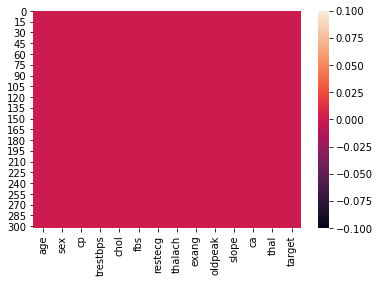

In [3]:
sns.heatmap(newDF.isnull())

### Taking a quick look at our data set

In [4]:
newDF.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
newDF.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### 

In [6]:
dataframe = newDF.sample(frac=1, random_state=42)
dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [7]:
dataframe['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

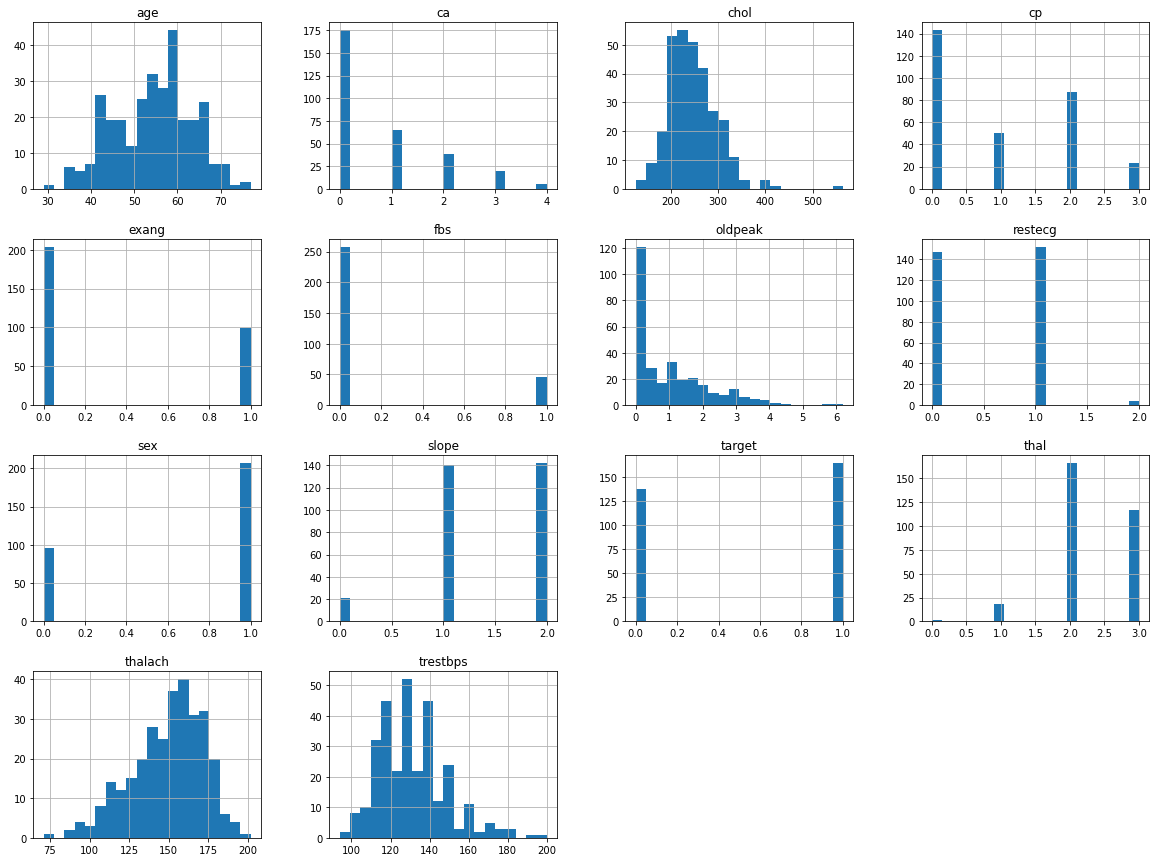

In [8]:
dataframe.hist(bins = 20, figsize = (20,15))
plt.show()

## Train Test Split

In [9]:
train_set, test_set = train_test_split(dataframe, test_size = 0.2,random_state=42)
print(train_set['target'].value_counts())
train_set

1    137
0    105
Name: target, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1


### We are going to leave the test set aside

## Our data is filled, we need to scale it and drop unnecessary columns

In [10]:
def clean_data(data):
    cp_dummies = pd.get_dummies(data['cp'], prefix='cp')
    thal_dummies = pd.get_dummies(data['thal'], prefix='thal')
    ecg_dummies = pd.get_dummies(data['restecg'], prefix='ecg')
    slope_dummies = pd.get_dummies(data['slope'], prefix='slope')
    ca_dummies = pd.get_dummies(data['ca'], prefix='ca')
    data=pd.concat([data,cp_dummies,thal_dummies,ecg_dummies,slope_dummies,ca_dummies],axis=1)
    
    data['log_chol'] = np.log(data['chol'])
    data['log_age'] = np.log(data['age'])
    data['log_thalach'] = np.log(data['thalach'])
    data['log_trestbps'] = np.log(data['trestbps'])    
    drop_cols = ['thalach', 'thal', 'trestbps', 'chol', 'cp', 'restecg', "slope", "age"]
    data = data.drop(drop_cols, axis=1)
    return data 

final_train_set=clean_data(train_set)
final_train_set

,sex,fbs,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,log_chol,log_age,log_thalach,log_trestbps
239,1,0,1,0.0,0,0,1,0,0,0,...,1,1,0,0,0,0,5.641907,3.555348,5.049856,4.836282
277,1,0,0,0.3,0,0,0,1,0,0,...,1,1,0,0,0,0,5.564520,4.043051,4.948760,4.820282
265,1,0,1,0.1,1,0,1,0,0,0,...,1,0,1,0,0,0,5.356586,4.189655,4.882802,4.718499
114,1,0,0,0.0,0,1,0,1,0,0,...,1,1,0,0,0,0,5.568345,4.007333,5.043425,4.867534
225,1,0,1,2.6,0,0,1,0,0,0,...,0,1,0,0,0,0,5.159055,4.248495,4.828314,4.976734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1,0,0,0.8,2,1,0,0,0,1,...,1,0,0,1,0,0,5.497168,3.737670,5.181784,4.997212
22,1,0,0,0.0,0,1,1,0,0,0,...,1,1,0,0,0,0,5.420535,3.737670,5.181784,4.941642
108,0,0,0,1.1,0,1,0,1,0,0,...,1,1,0,0,0,0,5.497168,3.912023,5.087596,4.787492
134,0,0,0,0.0,0,1,0,1,0,0,...,1,1,0,0,0,0,5.723585,3.713572,5.093750,4.836282


## Checking for correlations in our dataset

In [11]:
train_corr = final_train_set.corr()

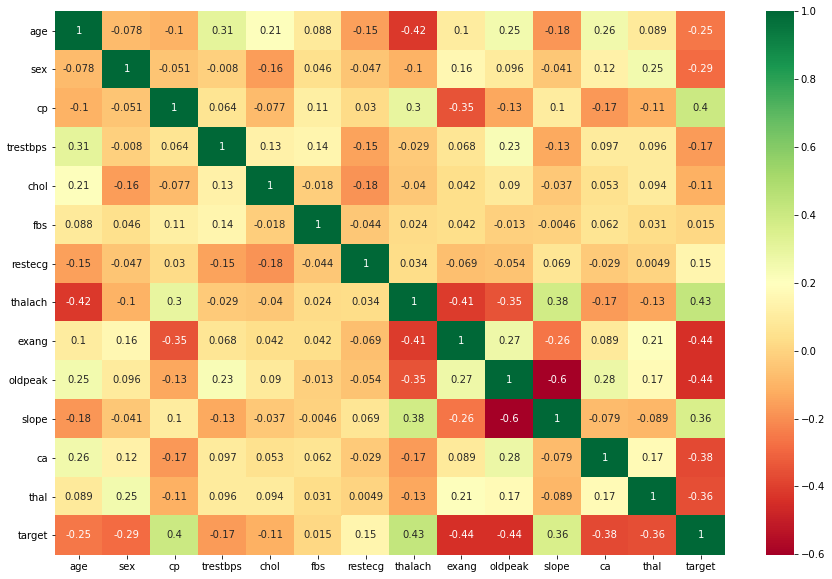

In [12]:
correlations = train_set.corr()
plt.figure (figsize= (15,10))

heatmap_diabetes = sns.heatmap(train_set.corr(), annot=True, cmap='RdYlGn')

plt.show()

#### As we can see, the strongest correlations are between the target and the thalach, cp and slope. Also, there is a strong negative correlation between the slope and the oldpeak, between the target and exang, target and oldpeak etc.

## Splitting our train set into x - y

In [13]:
x_train = final_train_set.drop(['target'], axis = 1)
y_train = final_train_set['target'].copy()

## Choosing models and comparing them

In [14]:
knn = KNeighborsClassifier()
dTree = DecisionTreeClassifier()
randomForest = RandomForestClassifier()
LogReg = LogisticRegression(max_iter = 3000)

In [15]:
knn.fit(x_train,y_train)
dTree.fit(x_train,y_train)
randomForest.fit(x_train,y_train)
LogReg.fit(x_train,y_train)

LogisticRegression(max_iter=3000)

In [16]:
knn_predict = cross_val_predict(knn, x_train, y_train, cv = 3)
dTree_predict = cross_val_predict(dTree, x_train, y_train, cv = 3)
randomForest_predict = cross_val_predict(randomForest, x_train, y_train, cv = 3)
LogReg_predict = cross_val_predict(LogReg, x_train, y_train, cv = 3)

### Inspecting the real values

In [17]:
print(np.array(y_train))

[0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1
 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1
 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]


### Looking at the confusion matrix of each model

In [18]:
knn_confusion_mat = confusion_matrix(y_train , knn_predict)
dTree_confusion_mat = confusion_matrix(y_train , dTree_predict)
randomForest_confusion_mat = confusion_matrix(y_train , randomForest_predict)
LogReg_confusion_mat = confusion_matrix(y_train , LogReg_predict)

In [19]:
def plot_mat (conf_matrix):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

The function above plots the confusion matrix for each model so we can visualize it and see it better

### Knn Confusion-Matrix

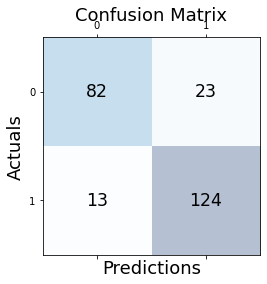

In [20]:
plot_mat(knn_confusion_mat)

### Decision Tree Confusion-Matrix

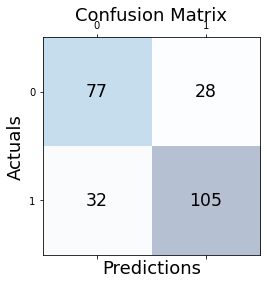

In [21]:
plot_mat(dTree_confusion_mat)

### Random Forest Confusion-Matrix

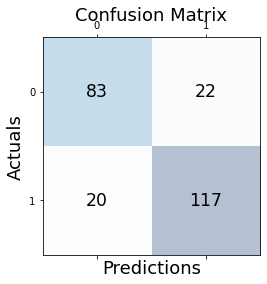

In [22]:
plot_mat(randomForest_confusion_mat)

### Logistic Regression Confusion-Matrix

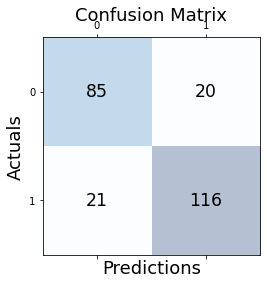

In [23]:
plot_mat(LogReg_confusion_mat)

### We would like to choose the model with the least FN's in order to diagnose the most patients with heart disease. It seems like the model that has the least FN's is the knn

## Evaluating each model's accuracy rate:

### k-nearest neighbor

In [24]:
knn_prec = precision_score(y_train , knn_predict)
print('precision:',knn_prec)

knn_recall = recall_score(y_train , knn_predict)
print('recall:',knn_recall)

knn_f1 = f1_score(y_train , knn_predict)
print('f1:',knn_f1)

knn_acc = accuracy_score(y_train , knn_predict)
print('accuracy:',knn_acc)

precision: 0.8435374149659864
recall: 0.9051094890510949
f1: 0.8732394366197184
accuracy: 0.8512396694214877


### Decision tree

In [25]:
dTree_prec = precision_score(y_train , dTree_predict)
print('precision:',dTree_prec)

dTree_recall = recall_score(y_train , dTree_predict)
print('recall:',dTree_recall)

dTree_f1 = f1_score(y_train , dTree_predict)
print('f1:',dTree_f1)

dTree_acc = accuracy_score(y_train , dTree_predict)
print('accuracy:',dTree_acc)

precision: 0.7894736842105263
recall: 0.7664233576642335
f1: 0.7777777777777777
accuracy: 0.7520661157024794


### Random Forest

In [26]:
randomForest_prec = precision_score(y_train , randomForest_predict)
print('precision:',dTree_prec)

randomForest_recall = recall_score(y_train , randomForest_predict)
print('recall:',dTree_recall)

randomForest_f1 = f1_score(y_train , randomForest_predict)
print('f1:',dTree_f1)

randomForest_acc = accuracy_score(y_train , randomForest_predict)
print('accuracy:',dTree_acc)

precision: 0.7894736842105263
recall: 0.7664233576642335
f1: 0.7777777777777777
accuracy: 0.7520661157024794


### Logistic Regression

In [27]:
LogReg_prec = precision_score(y_train , LogReg_predict)
print('precision:',LogReg_prec)

LogReg_recall = recall_score(y_train , LogReg_predict)
print('recall:',LogReg_recall)

LogReg_f1 = f1_score(y_train , LogReg_predict)
print('f1:',LogReg_f1)

LogReg_acc = accuracy_score(y_train , LogReg_predict)
print('accuracy:',LogReg_acc)

precision: 0.8529411764705882
recall: 0.8467153284671532
f1: 0.8498168498168498
accuracy: 0.8305785123966942


### The Knn and the Logistic Regression seem to be performing the best, let's check their ROC and AUC score:

### Logistic Regression:

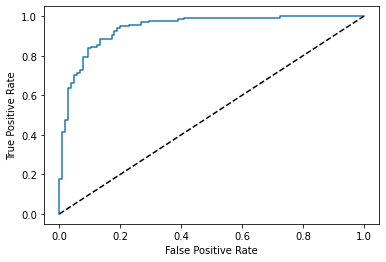

In [30]:
y_score = LogReg.predict_proba(x_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_score)
plt.plot(fpr,tpr,[0, 1], [0, 1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### AUC score:

In [42]:
roc_auc_score(y_train,LogReg_predict)

0.8281195689954813

### Knn:

[2.  1.  0.8 0.6 0.4 0.2 0. ]


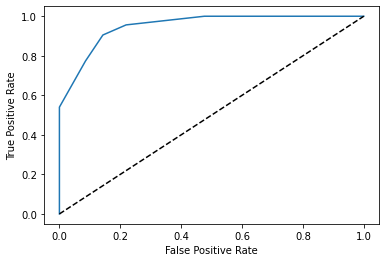

In [40]:
y_score = knn.predict_proba(x_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_score)
plt.plot(fpr,tpr,[0, 1], [0, 1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### AUC score:

In [32]:
roc_auc_score(y_train,knn_predict)

0.843030935001738

The ROC curve shows the ratio between the True Positive Rate and the False Positive Rate of the model for the variation of all the thresholds. The more the top left corner is close to 1,  the model is more accuate. The AUC is the area under the curve. The more the area is close to 1 we can say that the model performs better. From our results we can see that the AUC score is 83% which is fairly high, also the top left corner is close to 1 which indicates that our model seems to be performing really good.

### Checking the model on our test set, but first lets update the changes to the test set too:

In [33]:
final_test_set=clean_data(test_set).drop('thal_0',axis=1)

We are dropping the 'thal_0' column because we want to predict the same table size as the train set.

### Final predictions

In [34]:
x_test = final_test_set.drop('target',axis=1)
y_test = final_test_set["target"].copy()
final_predictions = knn.predict(x_test)
final_f1 = f1_score(y_test,final_predictions)
print(final_f1 * 100, '%')

80.70175438596492 %


The total score of the knn model is 80% after using cross validation let's compare the score to a dummy model:

## Comparing our model to a dummy model

In [35]:
from sklearn.dummy import DummyClassifier

We will use a dummy model that predicts the most frequent value, this model is more "sophisticated" model than a dummy model that predicts only one simple value:

In [36]:
dummy_clf=DummyClassifier(strategy="most_frequent")

In [37]:
dummy_clf.fit(x_train,y_train)
predicts=dummy_clf.predict(x_train)
test_predicts=dummy_clf.predict(x_test)

Let's check the f1 score for each set (The f1 is a harmonic average between the recall and the precision):

In [38]:
print(f1_score(y_train,predicts)*100,'%', "for the train set")
print(f1_score(y_test,test_predicts)*100,'%', "for the test set")

72.29551451187335 % for the train set
62.92134831460674 % for the test set


#### We can notice that our knn model preformed better than the dummy model with a final scoring of 80%